In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [9]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * coef1) + 1000 * coef1
    elif x > 2000:
        x = x - 2000
        x = (x * coef2) + 2000 * coef2
    return x

In [10]:
headers = ['freq', 'value']
gly = pd.read_csv('Глицин Fluka.CSV', names=headers)
gly_modified = pd.read_csv('Глицин модифиц.CSV', names=headers)
gly_calculated = pd.read_csv('zwitterion_glycine_ir2.txt', names=headers)
gly_calculated_4_water = pd.read_csv('zwitterion_solv_ir.txt', names=headers)
two_gly_calculated = pd.read_csv('2zw_GLy_2ver_freq_ir.txt', names=headers)
two_gly_calculated_4_water = pd.read_csv('2ZwGLY_water_freq_ir.txt', names=headers)
two_gly_calculated_6_water = pd.read_csv('2ZwGLY_6water_freq_ir2.txt', names=headers)
four_gly_calculated_4_water = pd.read_csv('4ZW_GLY_4water_freq_ir.txt', names=headers)
four_gly_calculated_8_water = pd.read_csv('4ZW_GLY_8water_freq_ir.txt', names=headers)

In [36]:
gly_x = gly['freq']
gly_y = gly['value'] * gly_calculated_4_water['value'].max()

gly_modified_x = gly_modified['freq']
gly_modified_y = gly_modified['value'] * gly_calculated_4_water['value'].max()

gly_calculated_y = gly_calculated['value'] * 3.33
gly_calculated_4_water_y = gly_calculated_4_water['value']

gly_calculated_peaks = peakutils.indexes(gly_calculated_y, thres=0.01, min_dist=1)
gly_calculated_4_water_peaks = peakutils.indexes(gly_calculated_4_water_y, thres=0.01, min_dist=1)

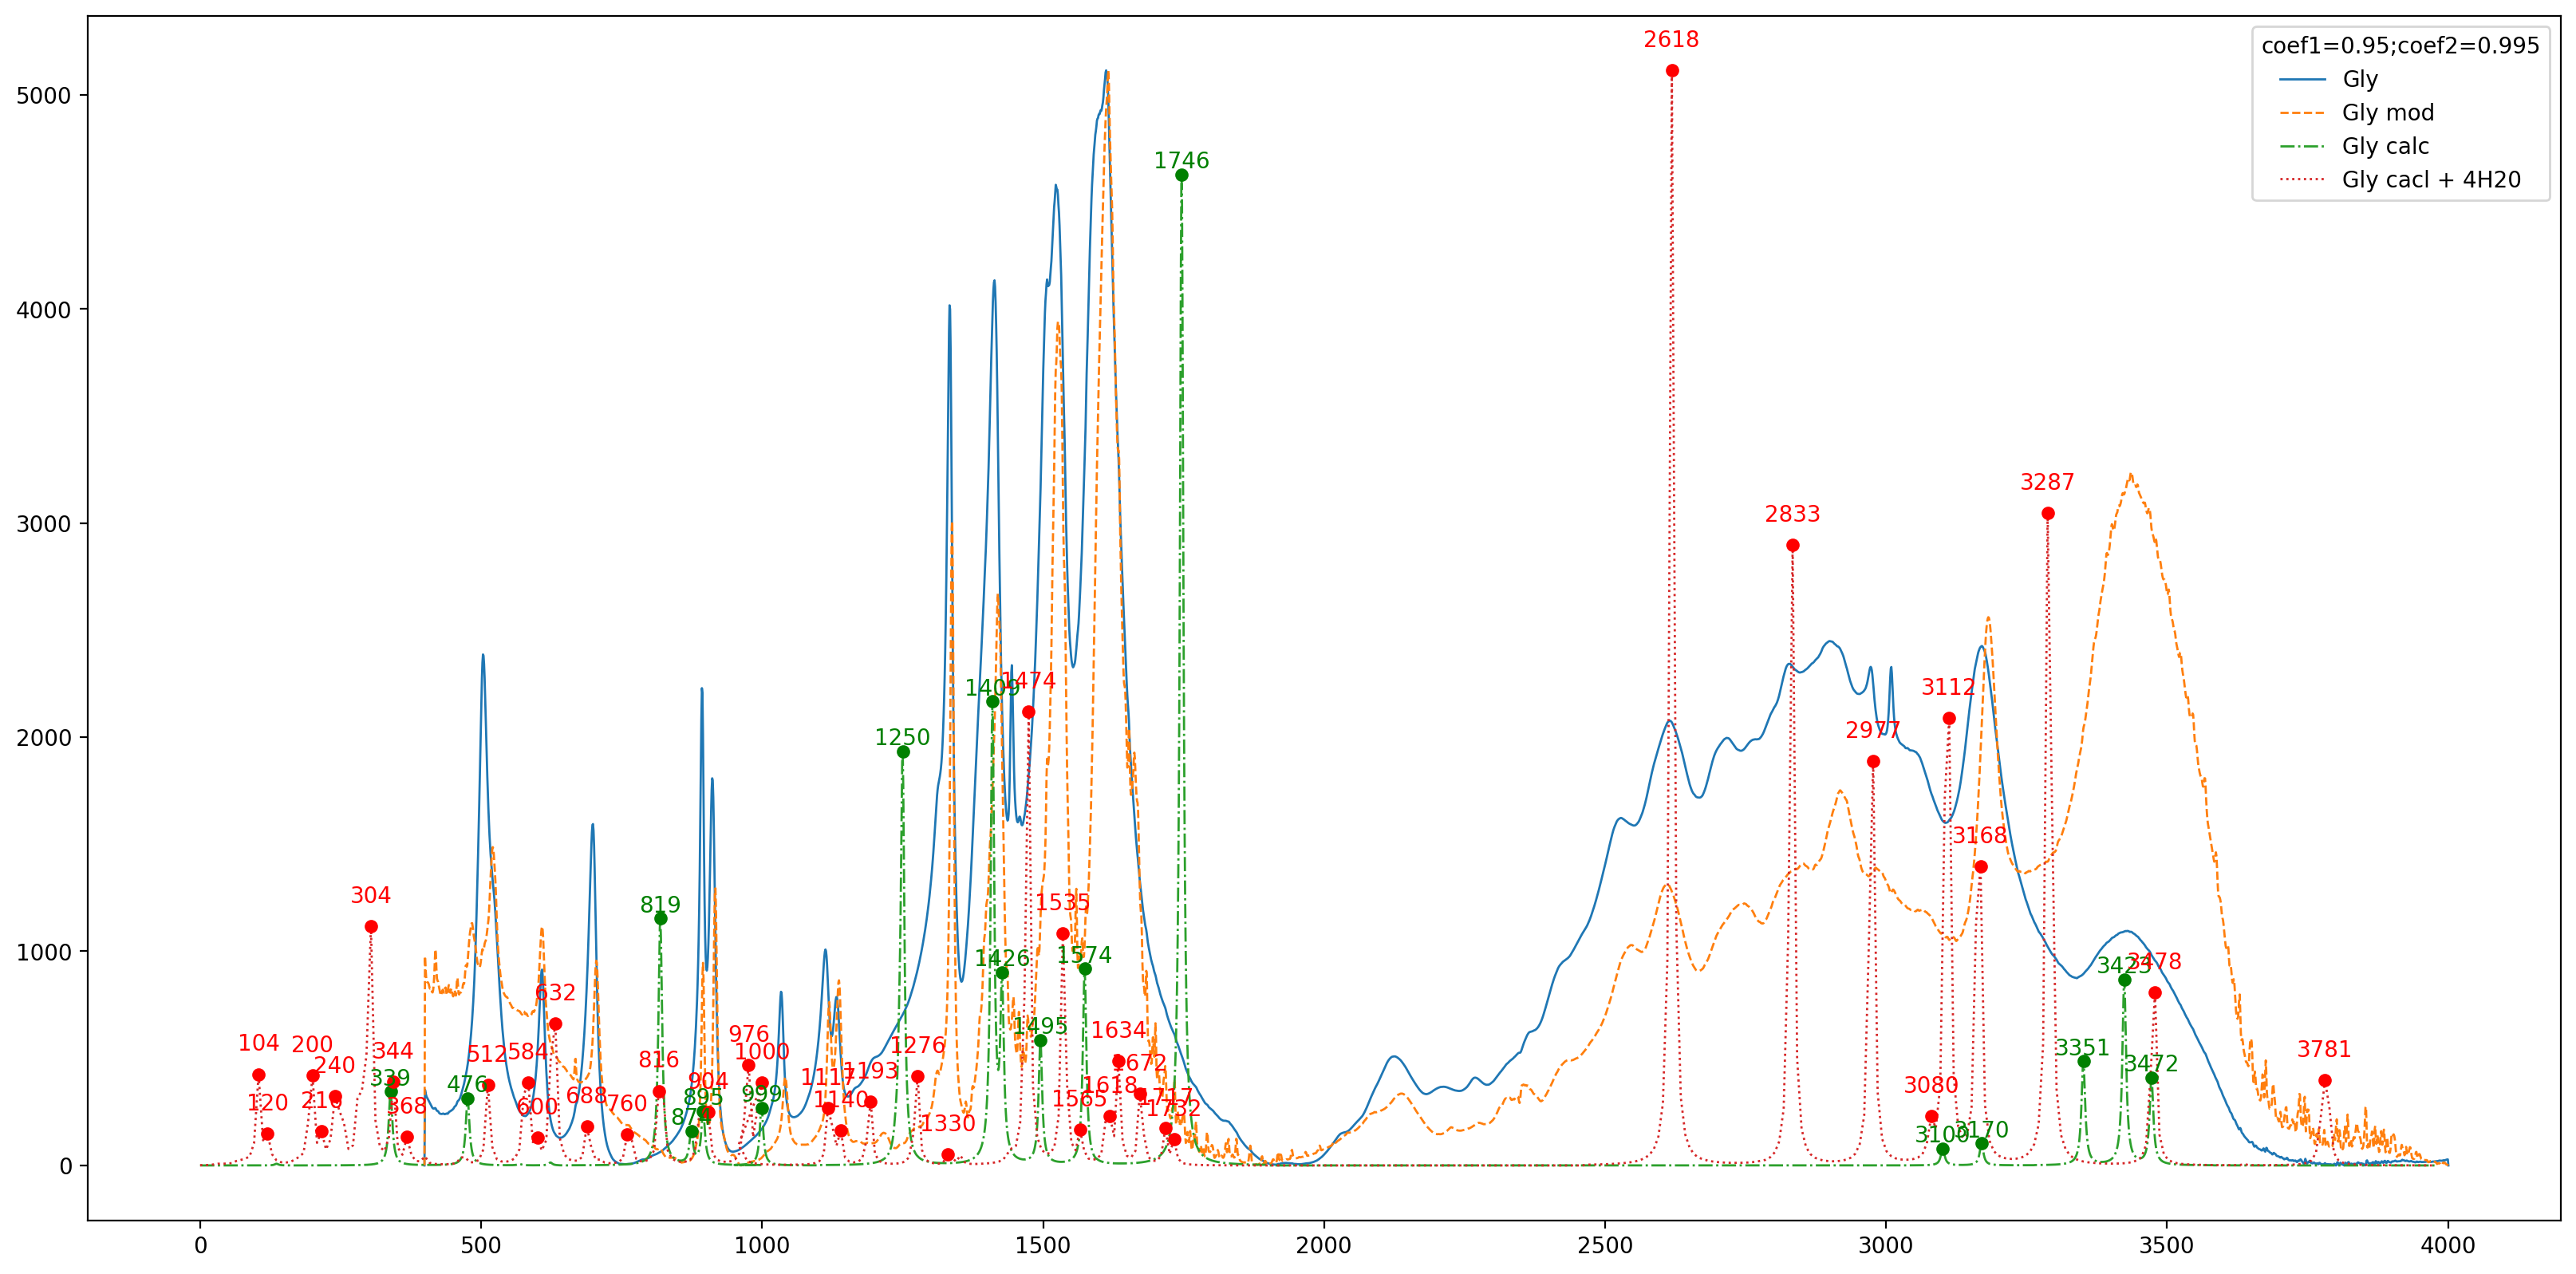

In [60]:
coef1 = 0.95
coef2 = 0.995
gly_calculated_x = gly_calculated['freq'].map(lambda x: do_anharmonism_correction(x, coef1, 0.995))
gly_calculated_4_water_x = gly_calculated_4_water['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))

for peak in gly_calculated_peaks:
    plt.text(gly_calculated_x[peak], gly_calculated_y[peak] + 30, int(gly_calculated_x[peak]),
             horizontalalignment='center', color='g')

for peak in gly_calculated_4_water_peaks:
    plt.text(gly_calculated_4_water_x[peak], gly_calculated_4_water_y[peak] + 110, int(gly_calculated_4_water_x[peak]),
             horizontalalignment='center', color='r')

plt.plot(gly_x, gly_y, '-', lw=1, alpha=1)
plt.plot(gly_modified_x, gly_modified_y, '--', lw=1, alpha=1)
plt.plot(gly_calculated_x, gly_calculated_y, '-.', lw=1, alpha=1)
plt.plot(gly_calculated_4_water_x, gly_calculated_4_water_y, ':', lw=1, alpha=1)

plt.plot(gly_calculated_x[gly_calculated_peaks], gly_calculated_y[gly_calculated_peaks], 'g', marker="o", ls="", ms=5)
plt.plot(gly_calculated_4_water_x[gly_calculated_4_water_peaks], gly_calculated_4_water_y[gly_calculated_4_water_peaks],
         'r', marker="o", ls="", ms=5)

plt.legend(['Gly', 'Gly mod', 'Gly calc', 'Gly calc + 4H20'], title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [139]:
def plot_graph(dataFrame_1, dataFrame_2, dataFrame_3, dataFrame_4, legends, legend_title, coef1=1, coef2=1, coef3=1,
               coef4=1, mp_y_1=1, mp_y_2=1, mp_y_3=1, mp_y_4=1):
    max = dataFrame_3['value'].max() if dataFrame_3['value'].max() > dataFrame_4['value'].max() else dataFrame_4[
        'value'].max()

    x1 = dataFrame_1['freq']
    y1 = dataFrame_1['value'] * max * mp_y_1

    x2 = dataFrame_2['freq']
    y2 = dataFrame_2['value'] * max * mp_y_2

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value'] * mp_y_3

    x4 = dataFrame_4['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y4 = dataFrame_4['value'] * mp_y_4

    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)
    peaks_4 = peakutils.indexes(y4, thres=0.01, min_dist=1)


    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)
    plt.plot(x4, y4, ':', lw=1.7, alpha=1)

    for peak in peaks_3:
        if x3[peak] > 2000:
            plt.text(x3[peak], y3[peak] + 50, int(x3[peak]), horizontalalignment='center', color='darkgreen')

    for peak in peaks_4:
        if x4[peak] > 2000:
            plt.text(x4[peak], y4[peak] + 110, int(x4[peak]), horizontalalignment='center', color='maroon')

    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x4[peaks_4], y4[peaks_4], 'maroon', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [140]:
def plot_graph_3(dataFrame_1, dataFrame_2, dataFrame_3, legends, legend_title, coef1=1, coef2=1, mp_y_1=1, mp_y_2=1,
                 mp_y_3=1):
    x1 = dataFrame_1['freq']
    y1 = dataFrame_1['value'] * dataFrame_3['value'].max() * mp_y_1

    x2 = dataFrame_2['freq']
    y2 = dataFrame_2['value'] * dataFrame_3['value'].max() * mp_y_2

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value'] * mp_y_3

    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)

    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)

    for peak in peaks_3:
        if x3[peak] > 2000:
            plt.text(x3[peak], y3[peak] + 50, int(x3[peak]), horizontalalignment='center', color='darkgreen')
    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **Gly calc** - расчетный IR глицина
- **Gly calc + 4H20** - расчетный IR глицина c 4 молекулами воды

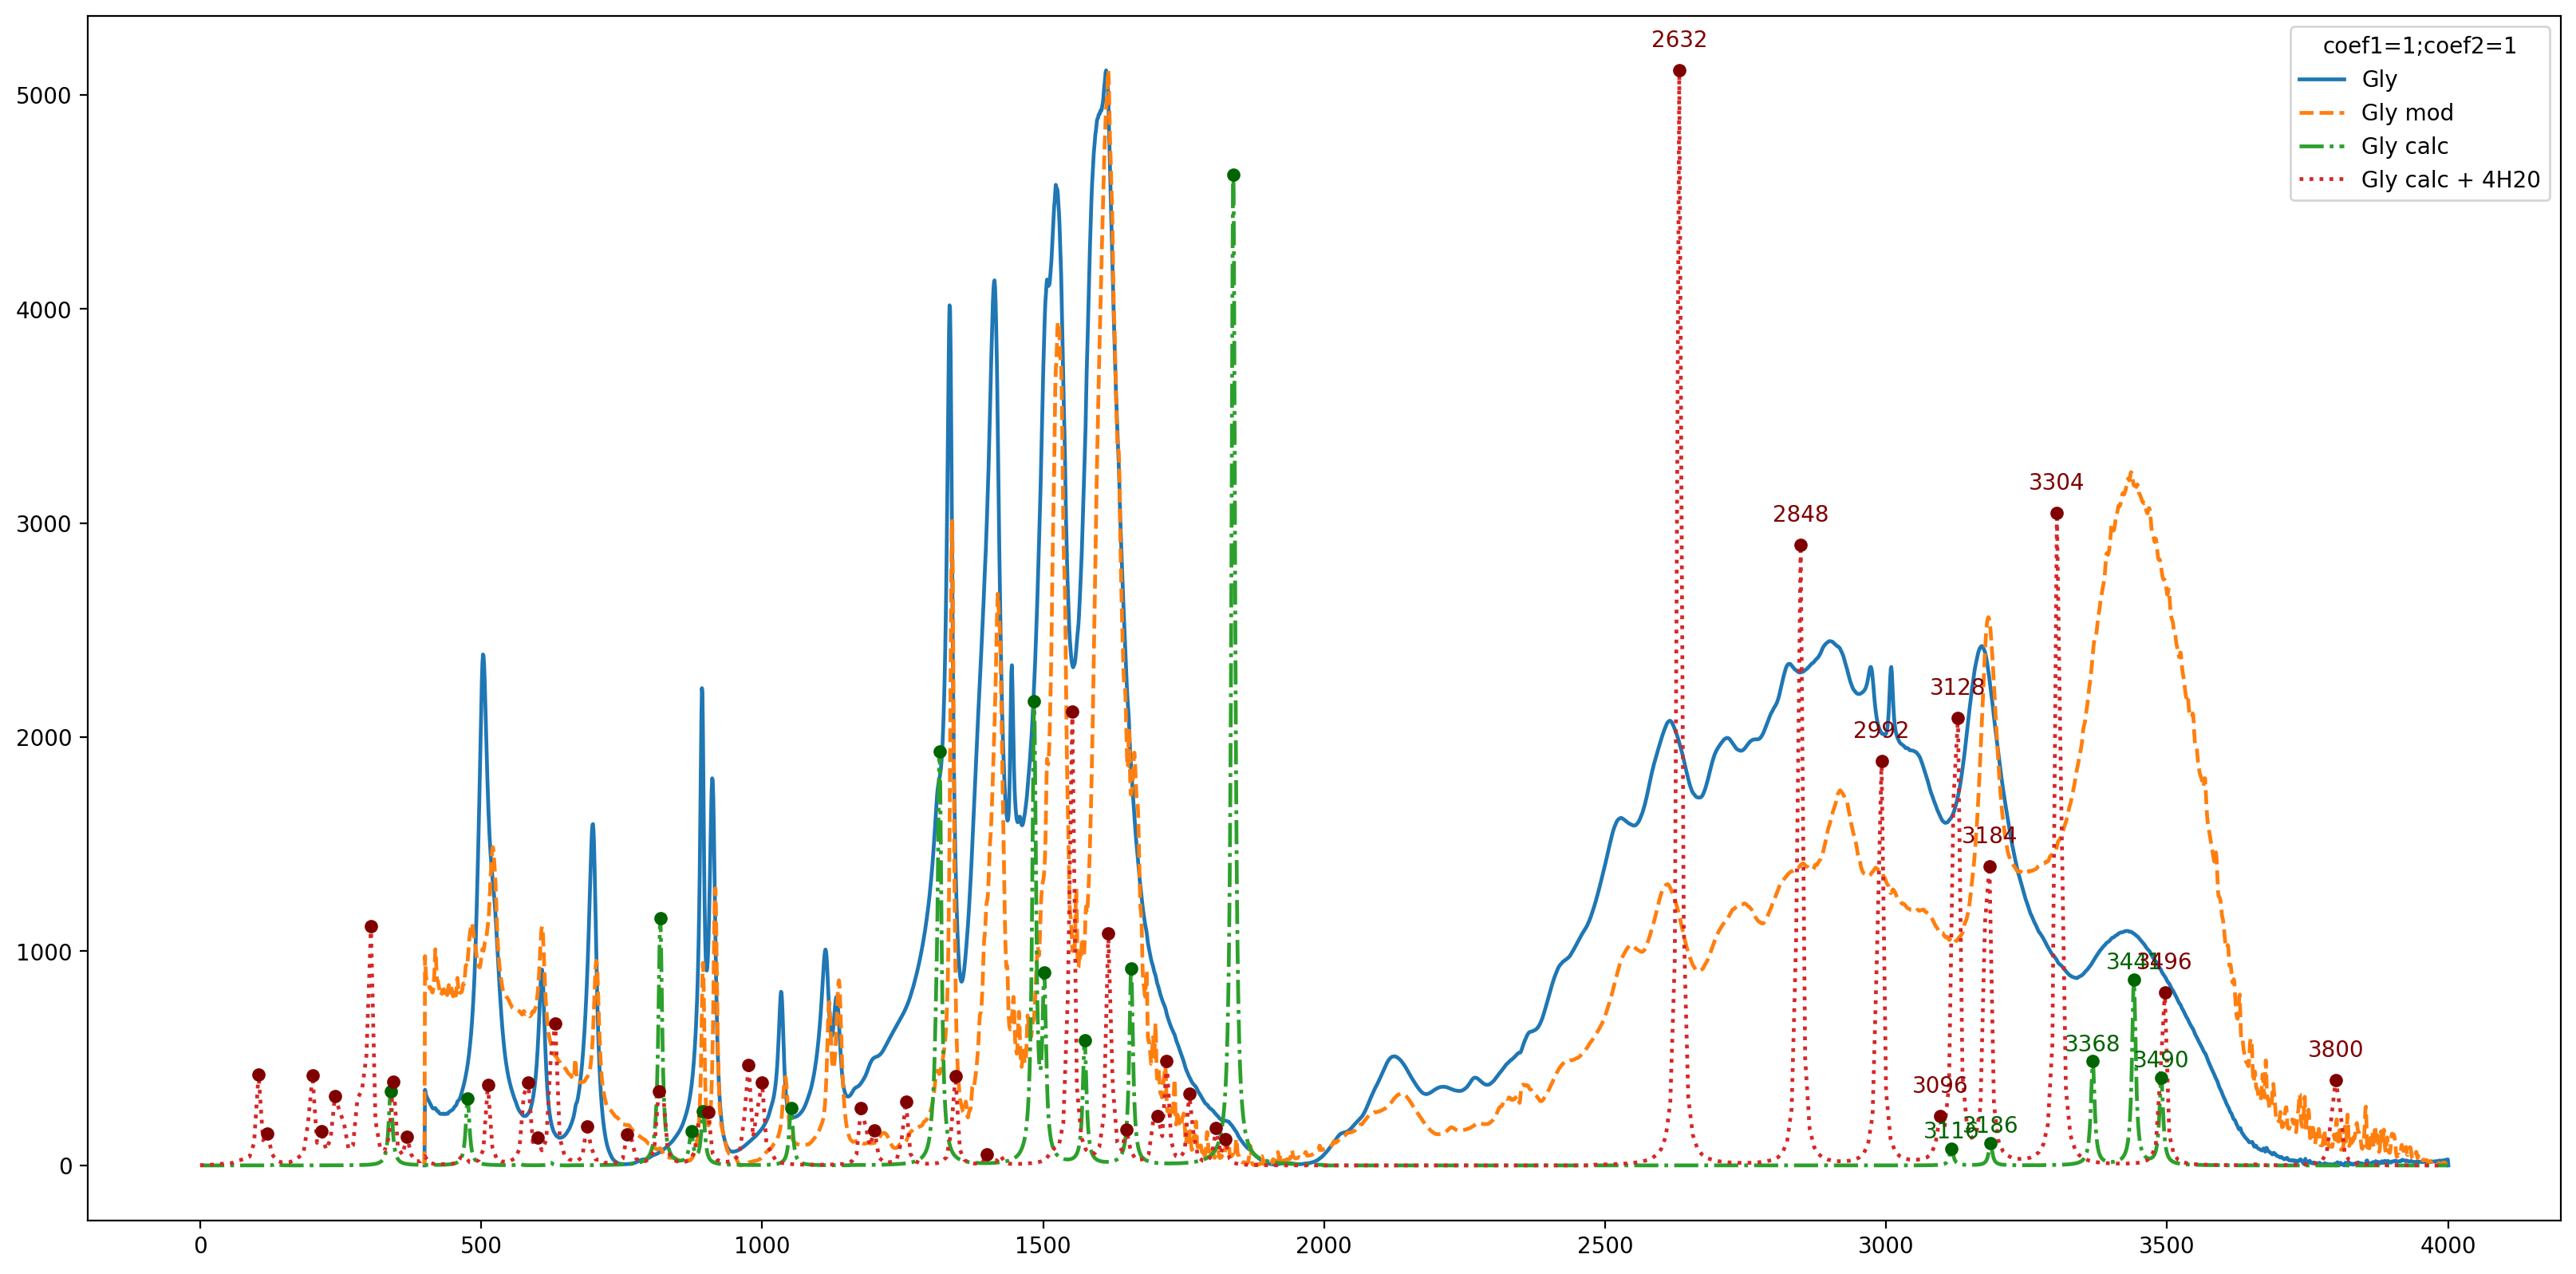

In [142]:
plot_graph(gly, gly_modified, gly_calculated, gly_calculated_4_water, ['Gly', 'Gly mod', 'Gly calc', 'Gly calc + 4H20'],
           '', mp_y_3=3.33)

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **2Gly calc** - расчетный IR димера глицина
- **2Gly calc + 4H20** - расчетный IR димера глицина c 4 молекулами воды

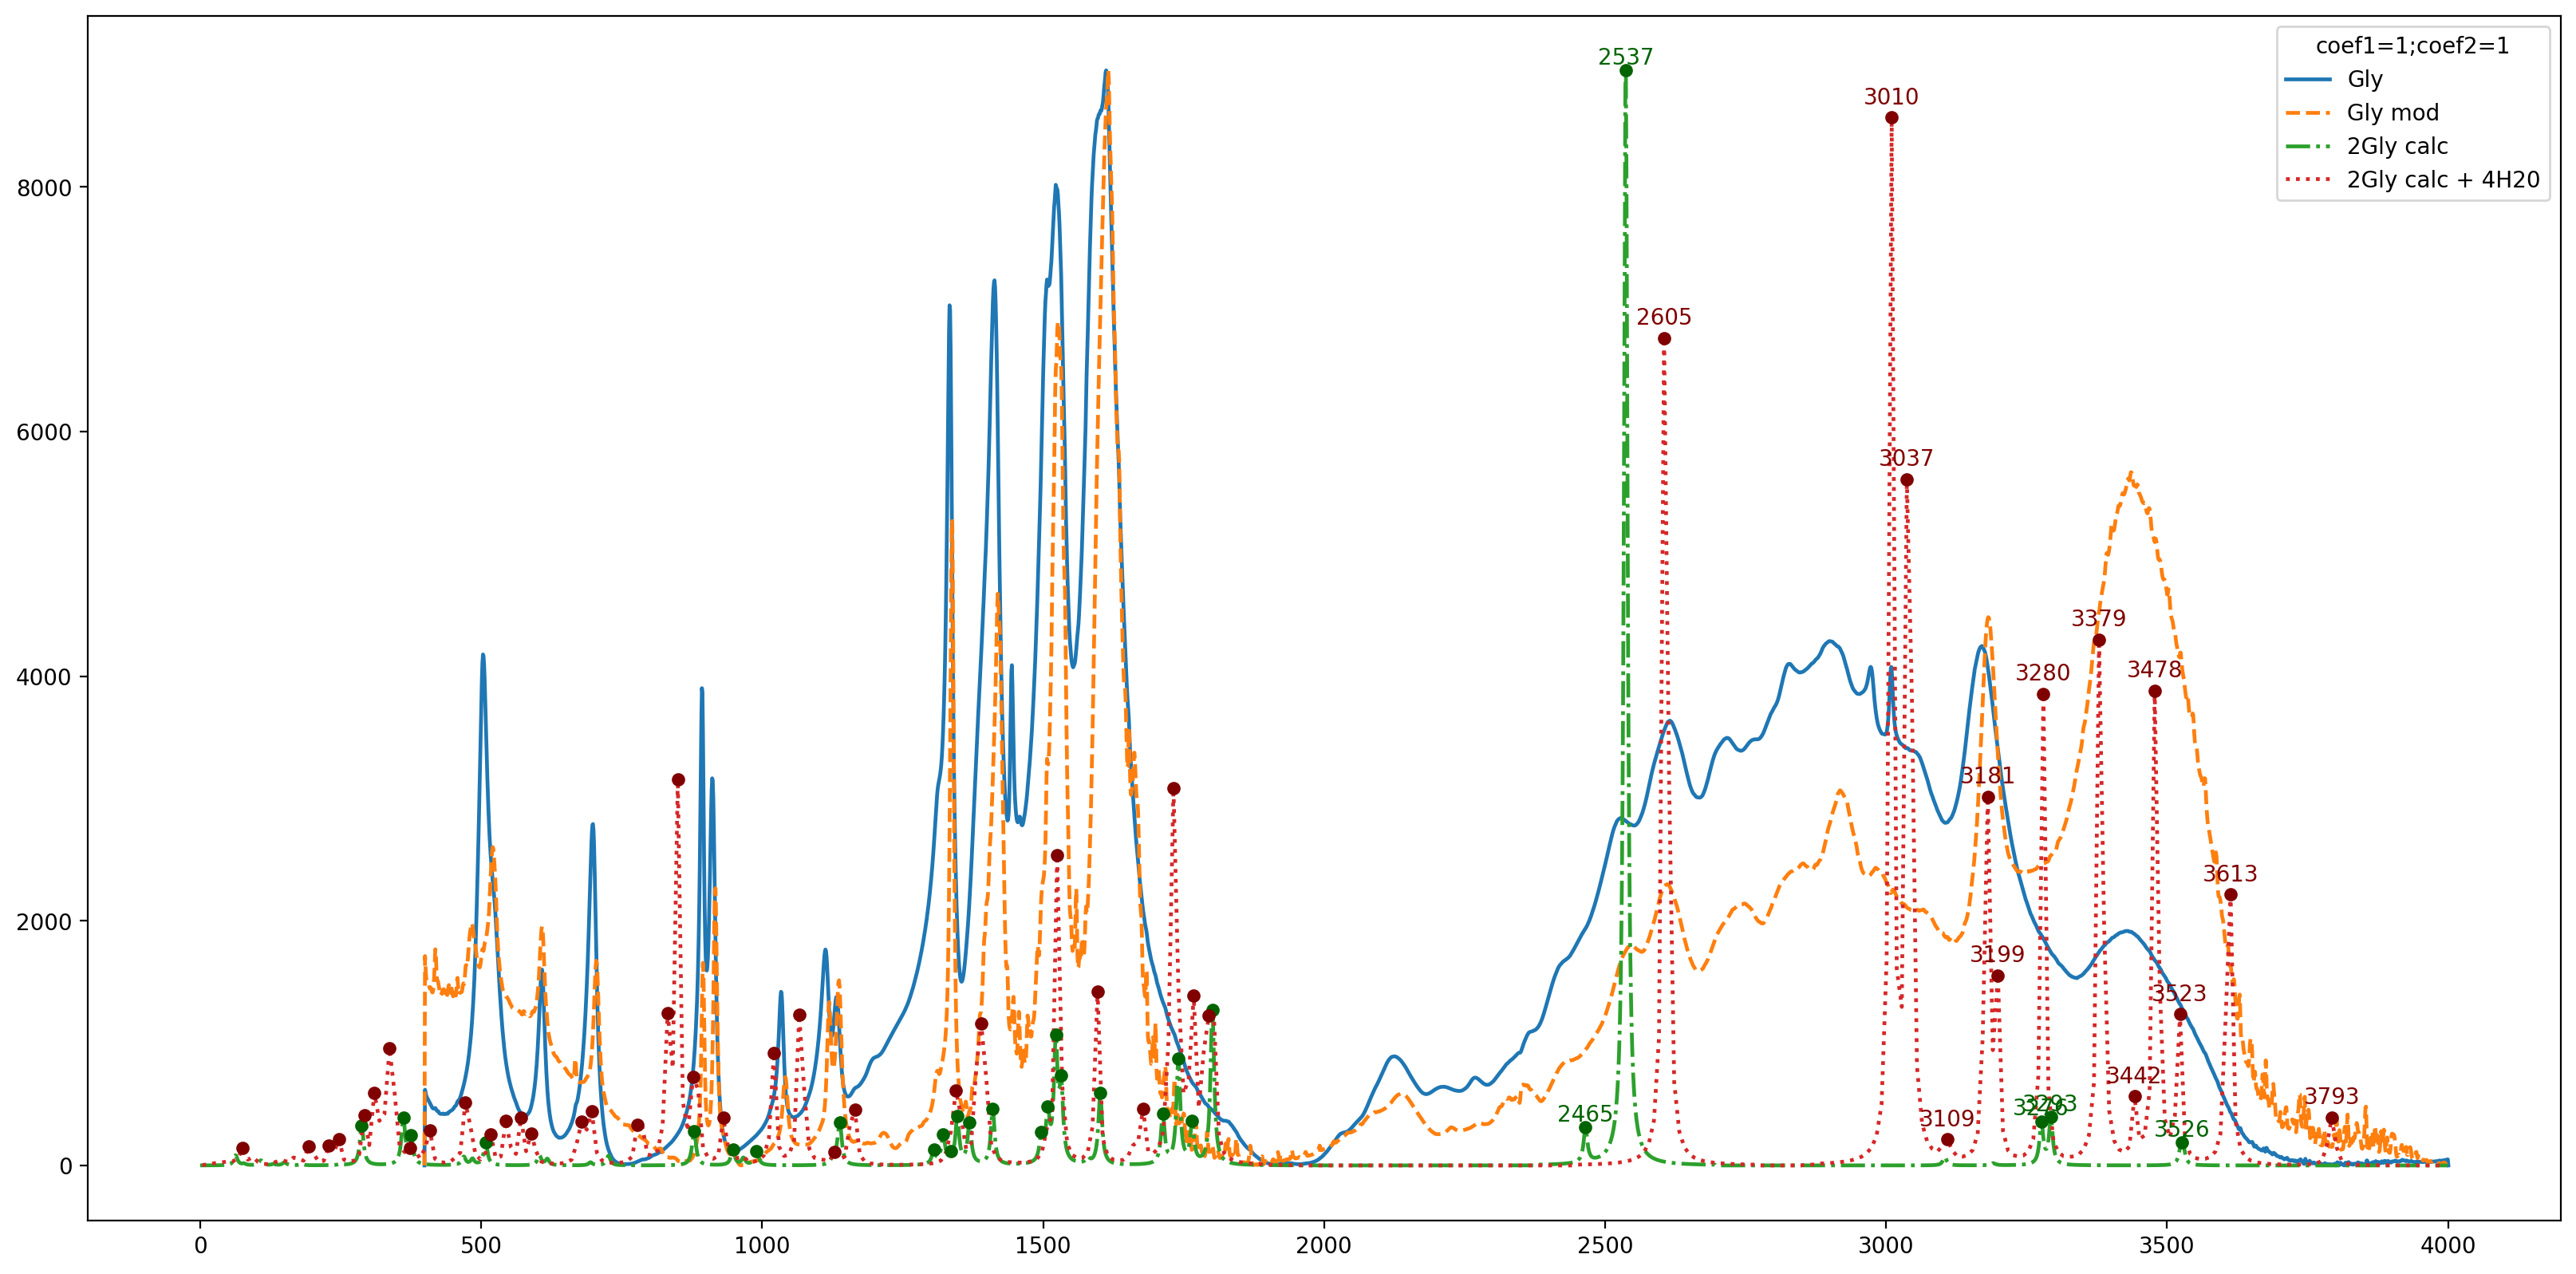

In [145]:
plot_graph(gly, gly_modified, two_gly_calculated, two_gly_calculated_4_water,
           ['Gly', 'Gly mod', '2Gly calc', '2Gly calс + 4H20'], '', mp_y_4=2.3)

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **2Gly calc** - расчетный IR димера глицина
- **2Gly calc + 6H20** - расчетный IR димера глицина c 6 молекулами воды

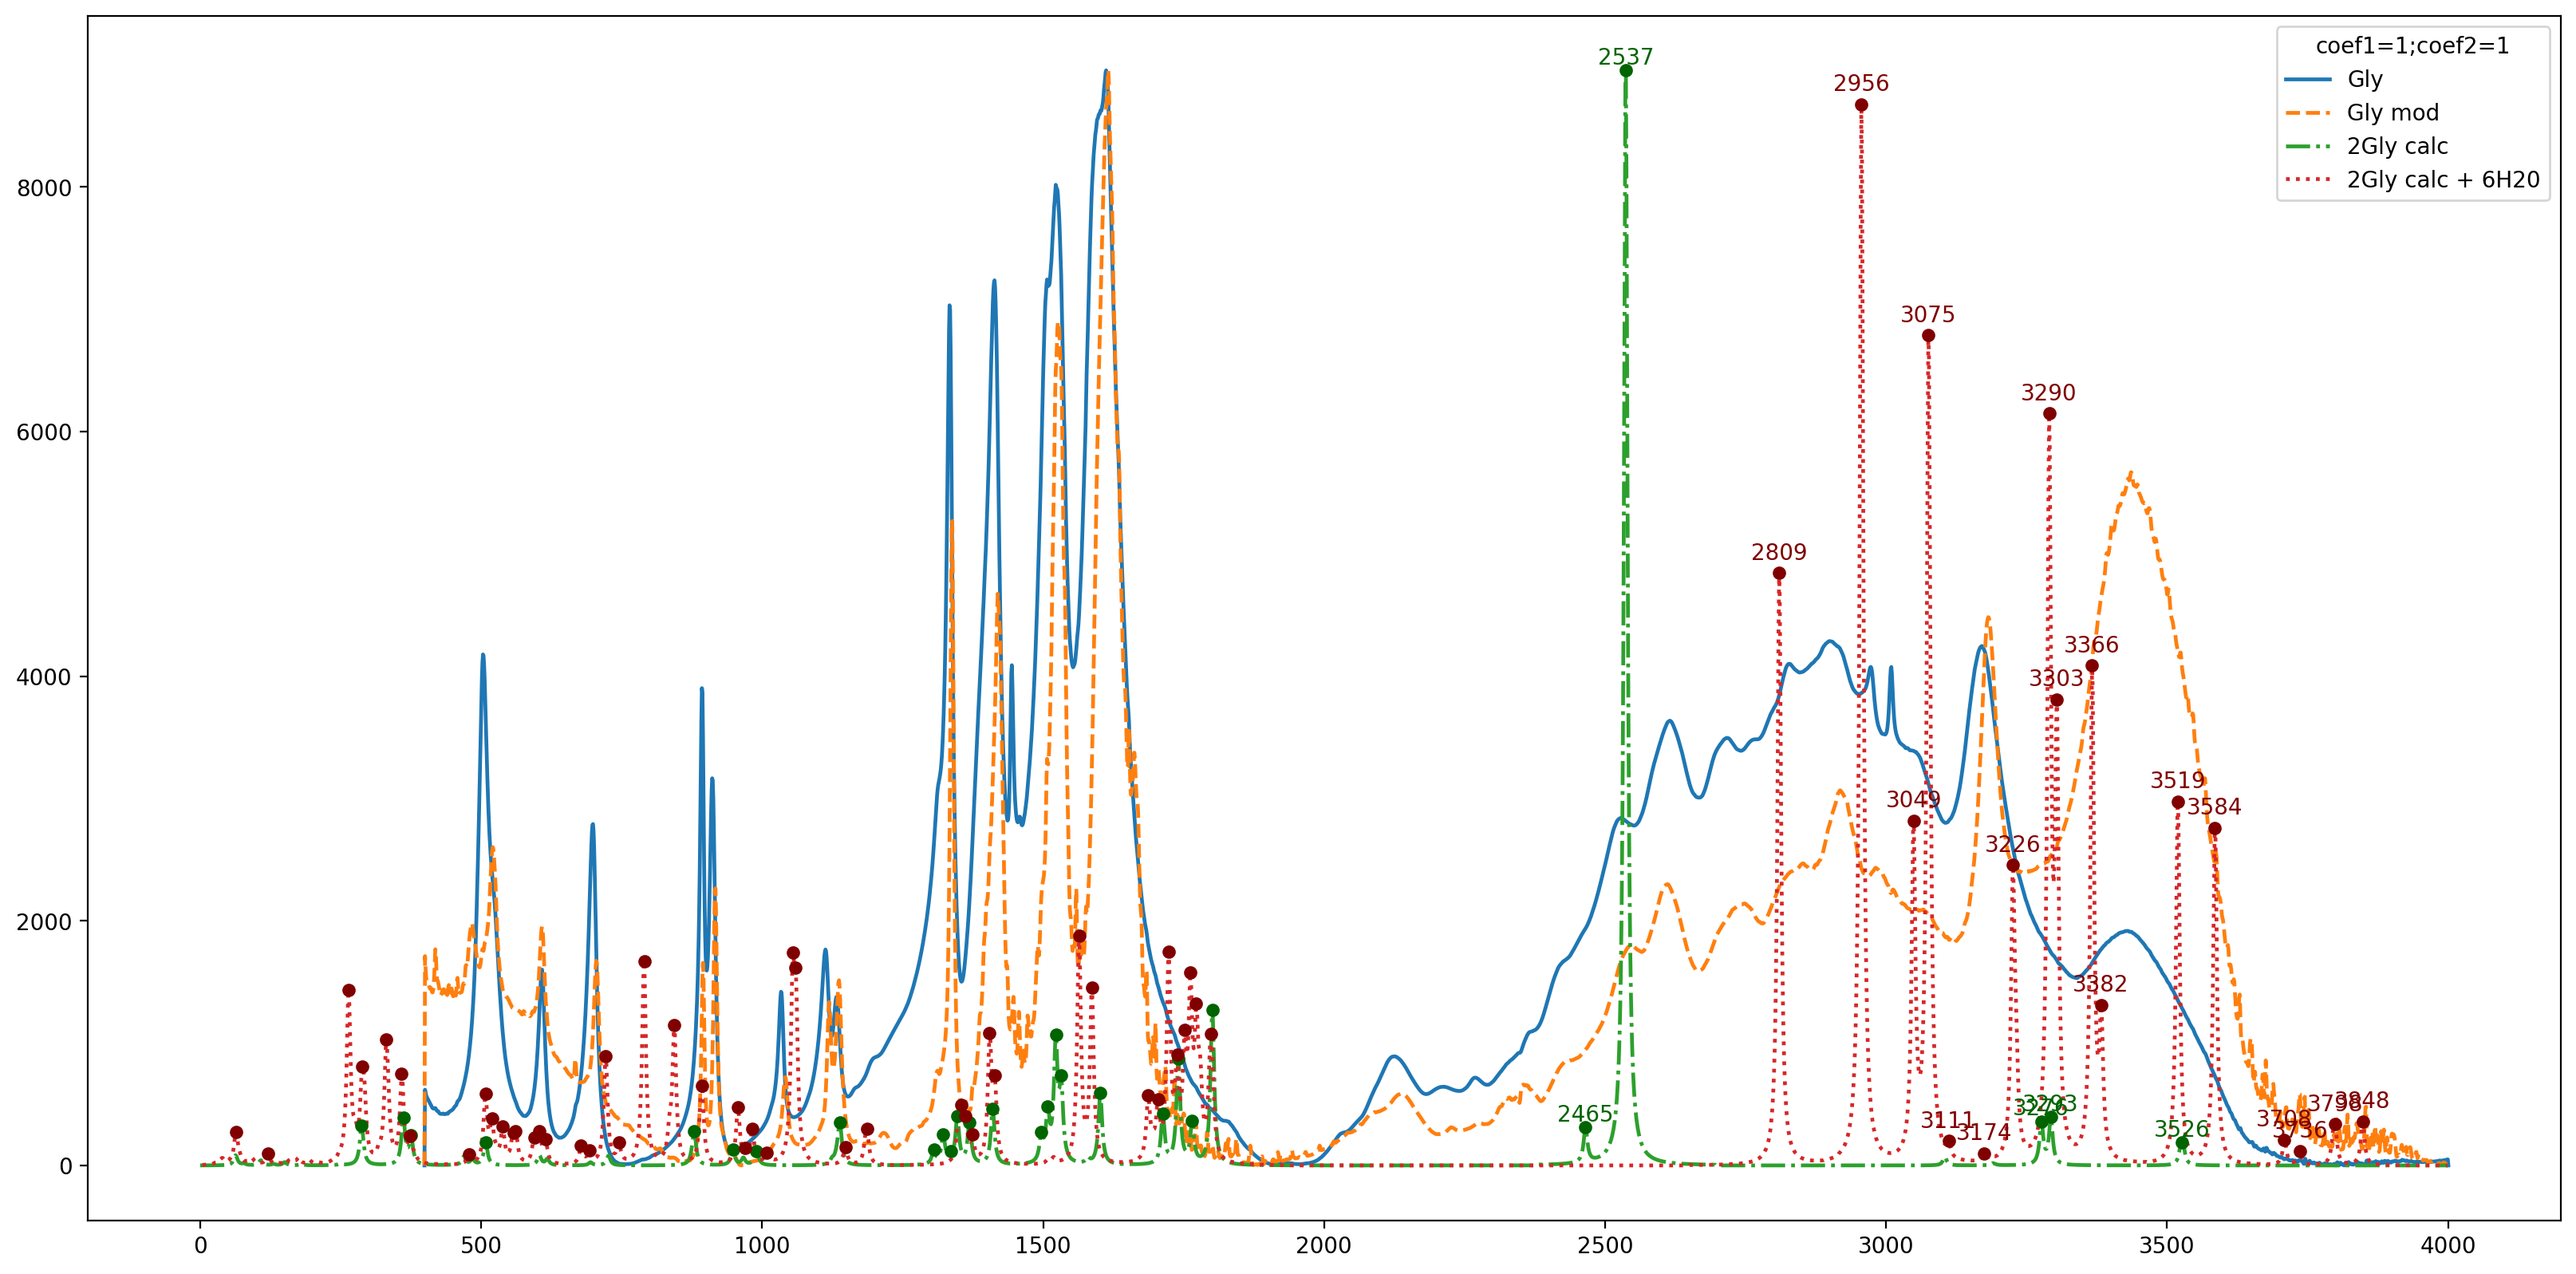

In [146]:
plot_graph(gly, gly_modified, two_gly_calculated, two_gly_calculated_6_water,
           ['Gly', 'Gly mod', '2Gly calc', '2Gly calc + 6H20'], '', mp_y_4=1.55)

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **4Gly calc + 8H20** - расчетный IR полимера глицина c 4 молекулами воды
- **4Gly calc + 8H20** - расчетный IR полимера глицина c 8 молекулами воды

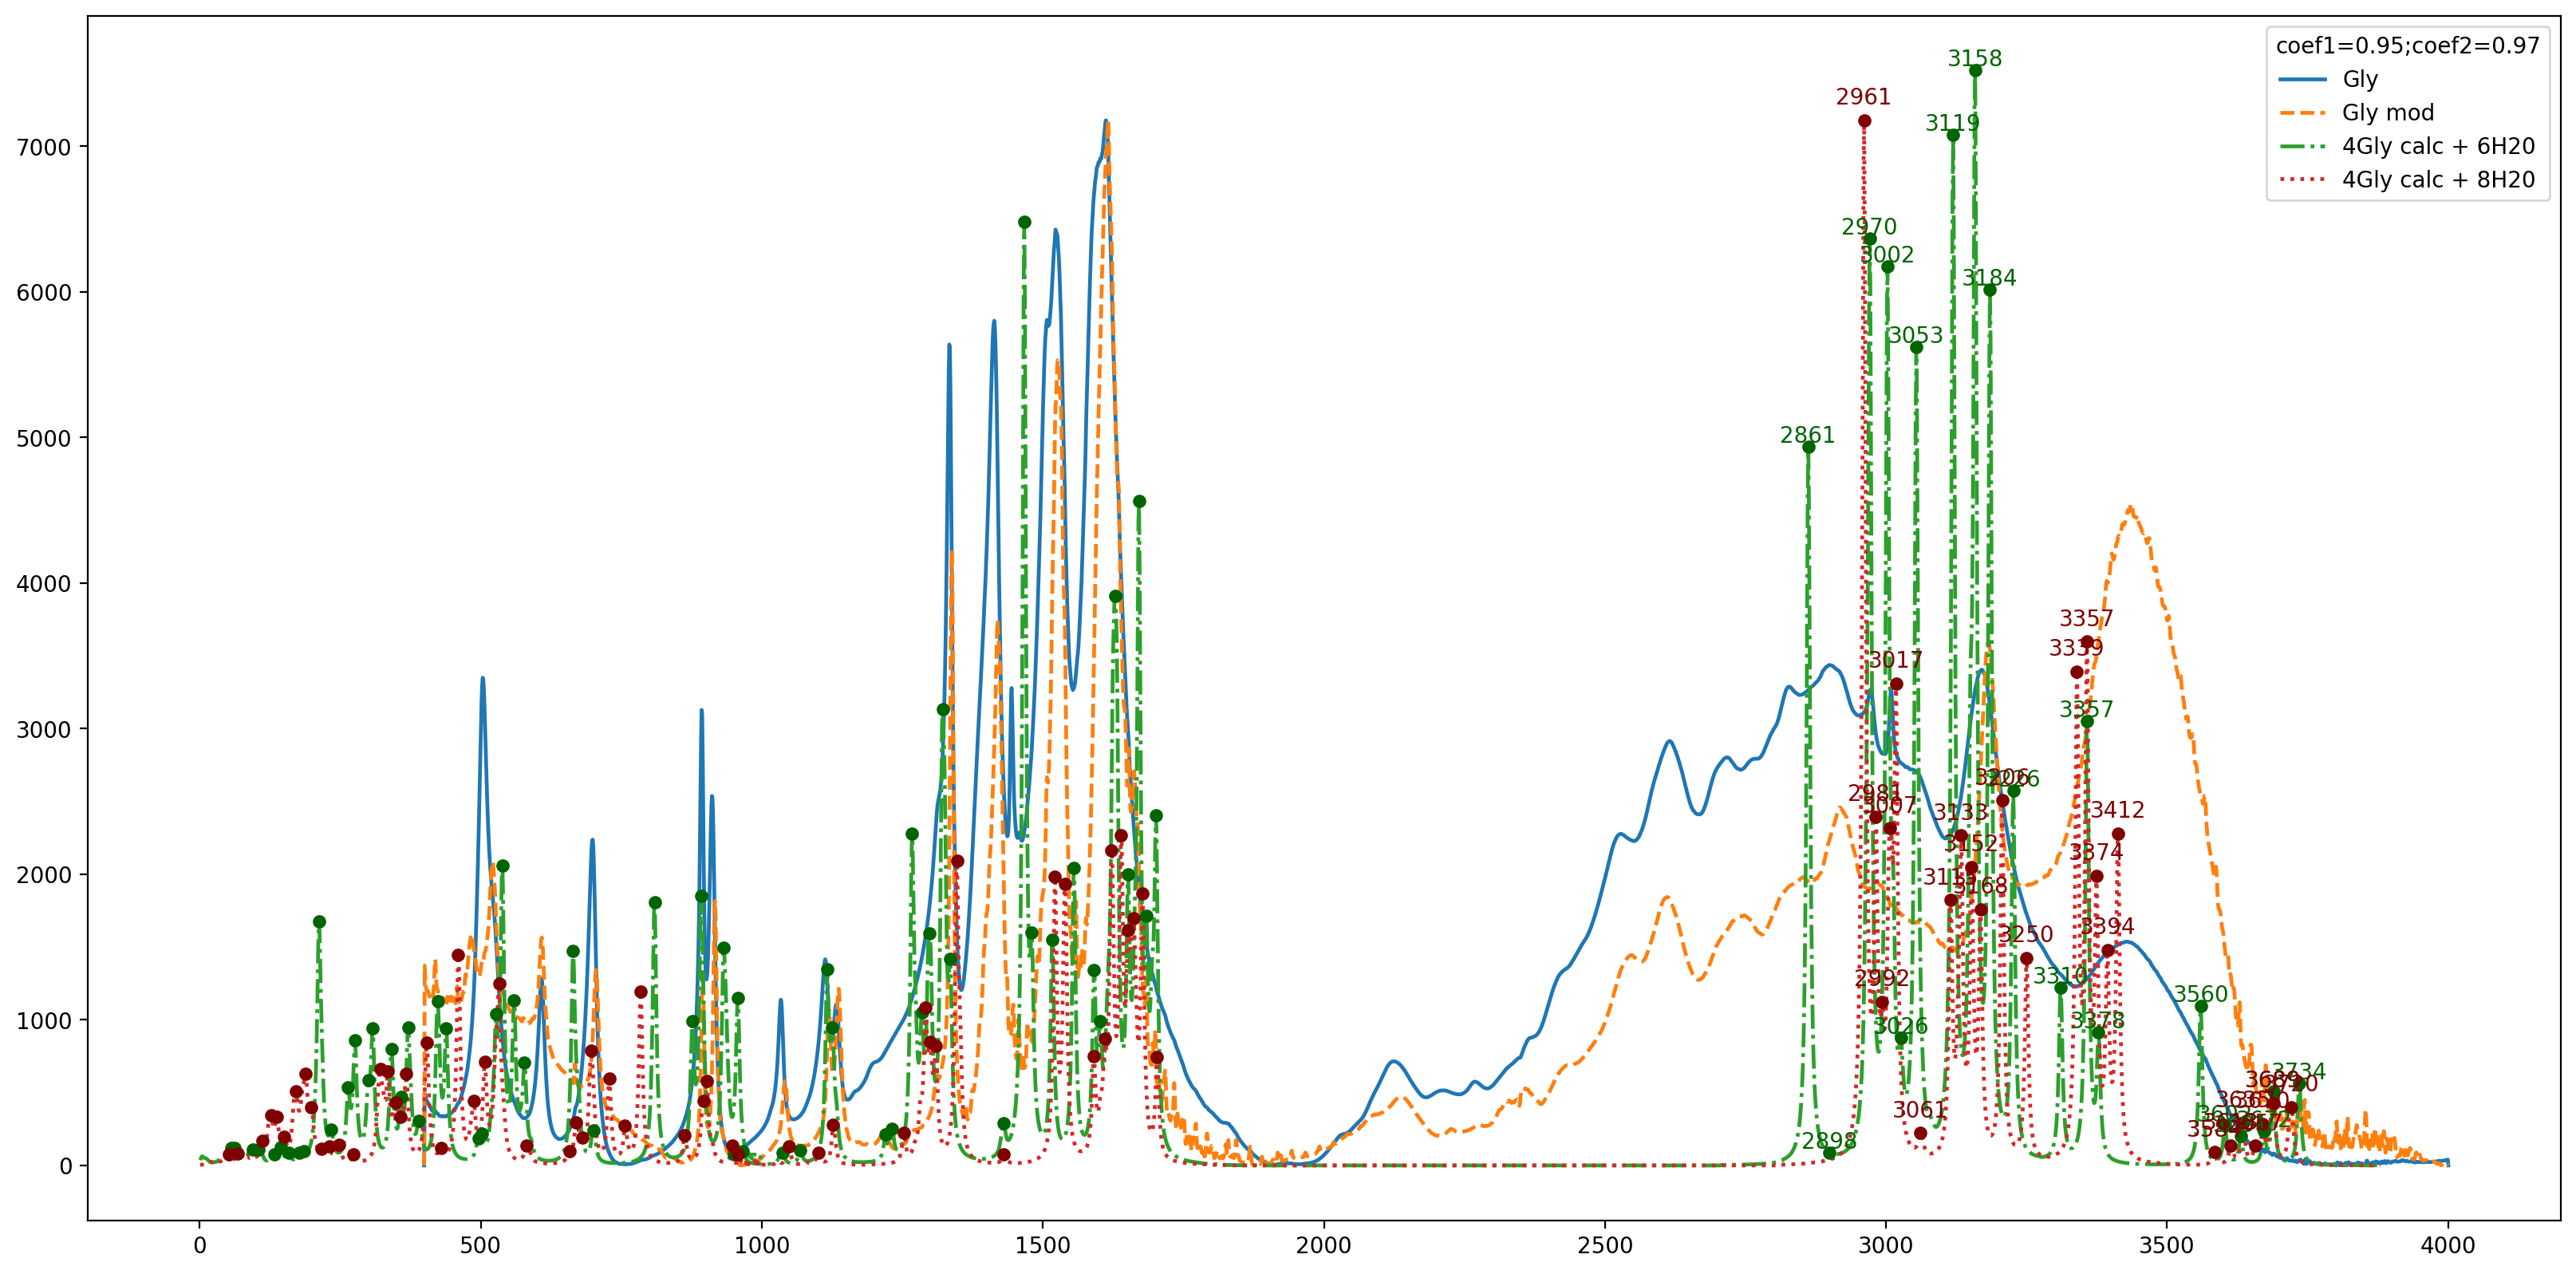

In [124]:
plot_graph(gly, gly_modified, four_gly_calculated_4_water, four_gly_calculated_8_water,
           ['Gly', 'Gly mod', '4Gly calc + 6H20', '4Gly calc + 8H20'], '', mp_y_3=2, coef1=0.95, coef2=0.97)

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **4Gly calc + 8H20** - расчетный IR полимера глицина c 4 молекулами воды

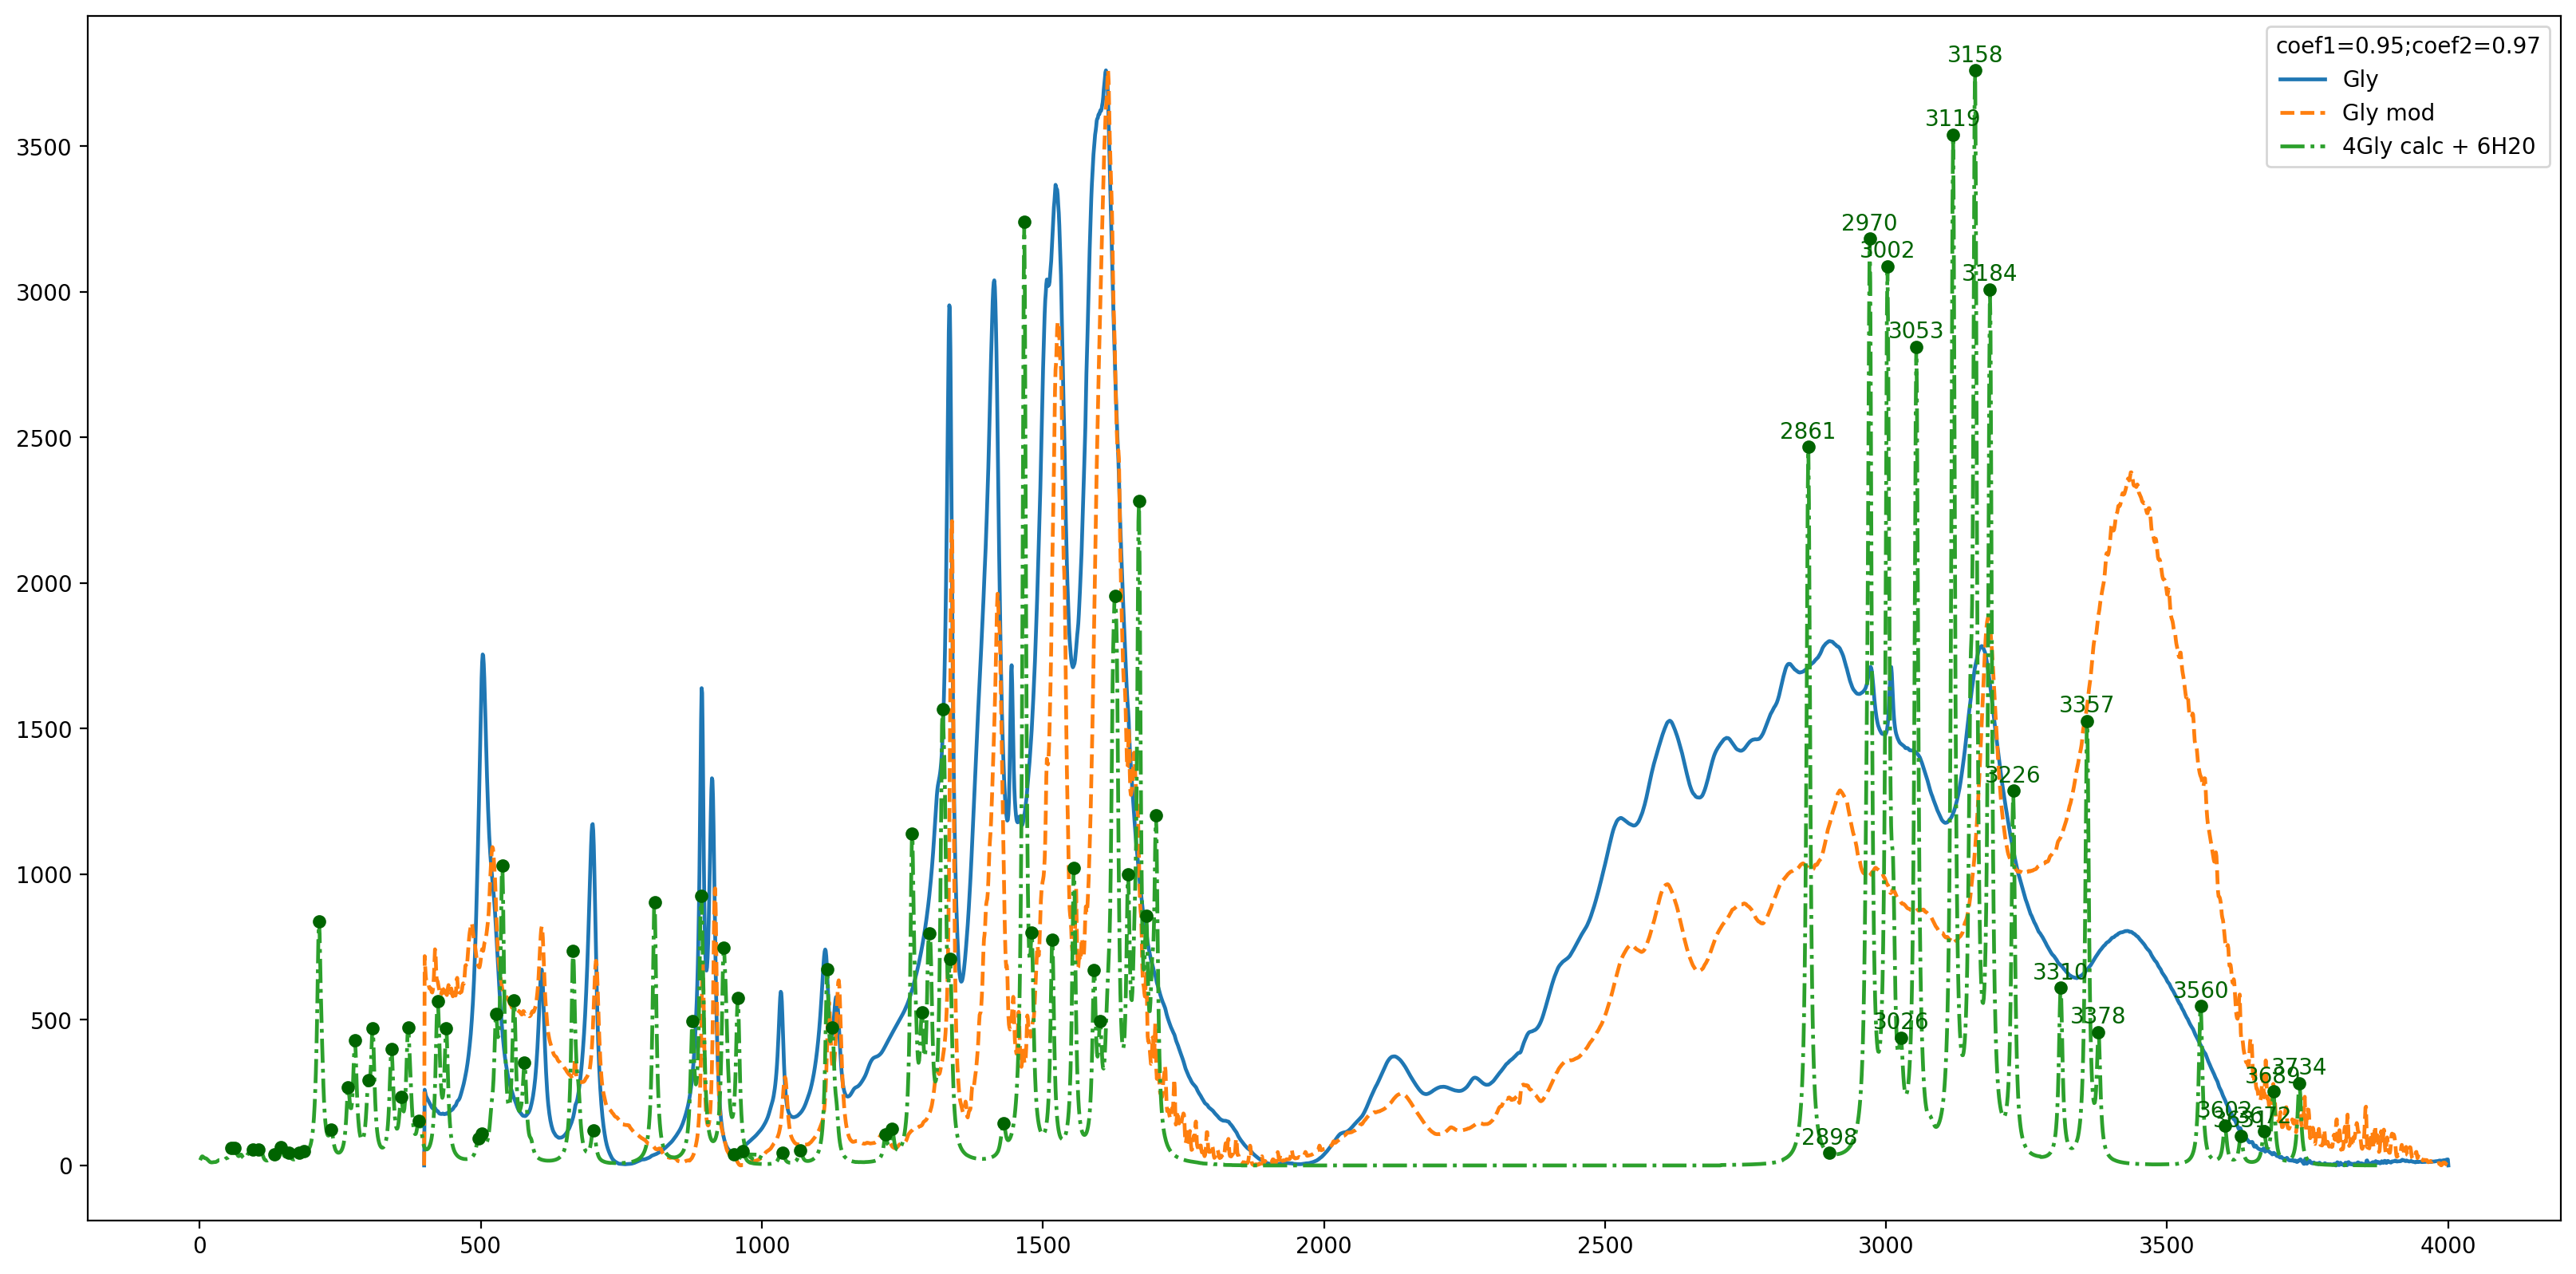

In [127]:
plot_graph_3(gly, gly_modified, four_gly_calculated_4_water, ['Gly', 'Gly mod', '4Gly calc + 6H20'], '', coef1=0.95,
             coef2=0.97)

## График глицина, глицина с водой

- **Gly** - экспериментальный IR глицина
- **Gly mod** - экспериментальный IR модифицированного глицина
- **4Gly calc + 8H20** - расчетный IR полимера глицина c 8 молекулами воды

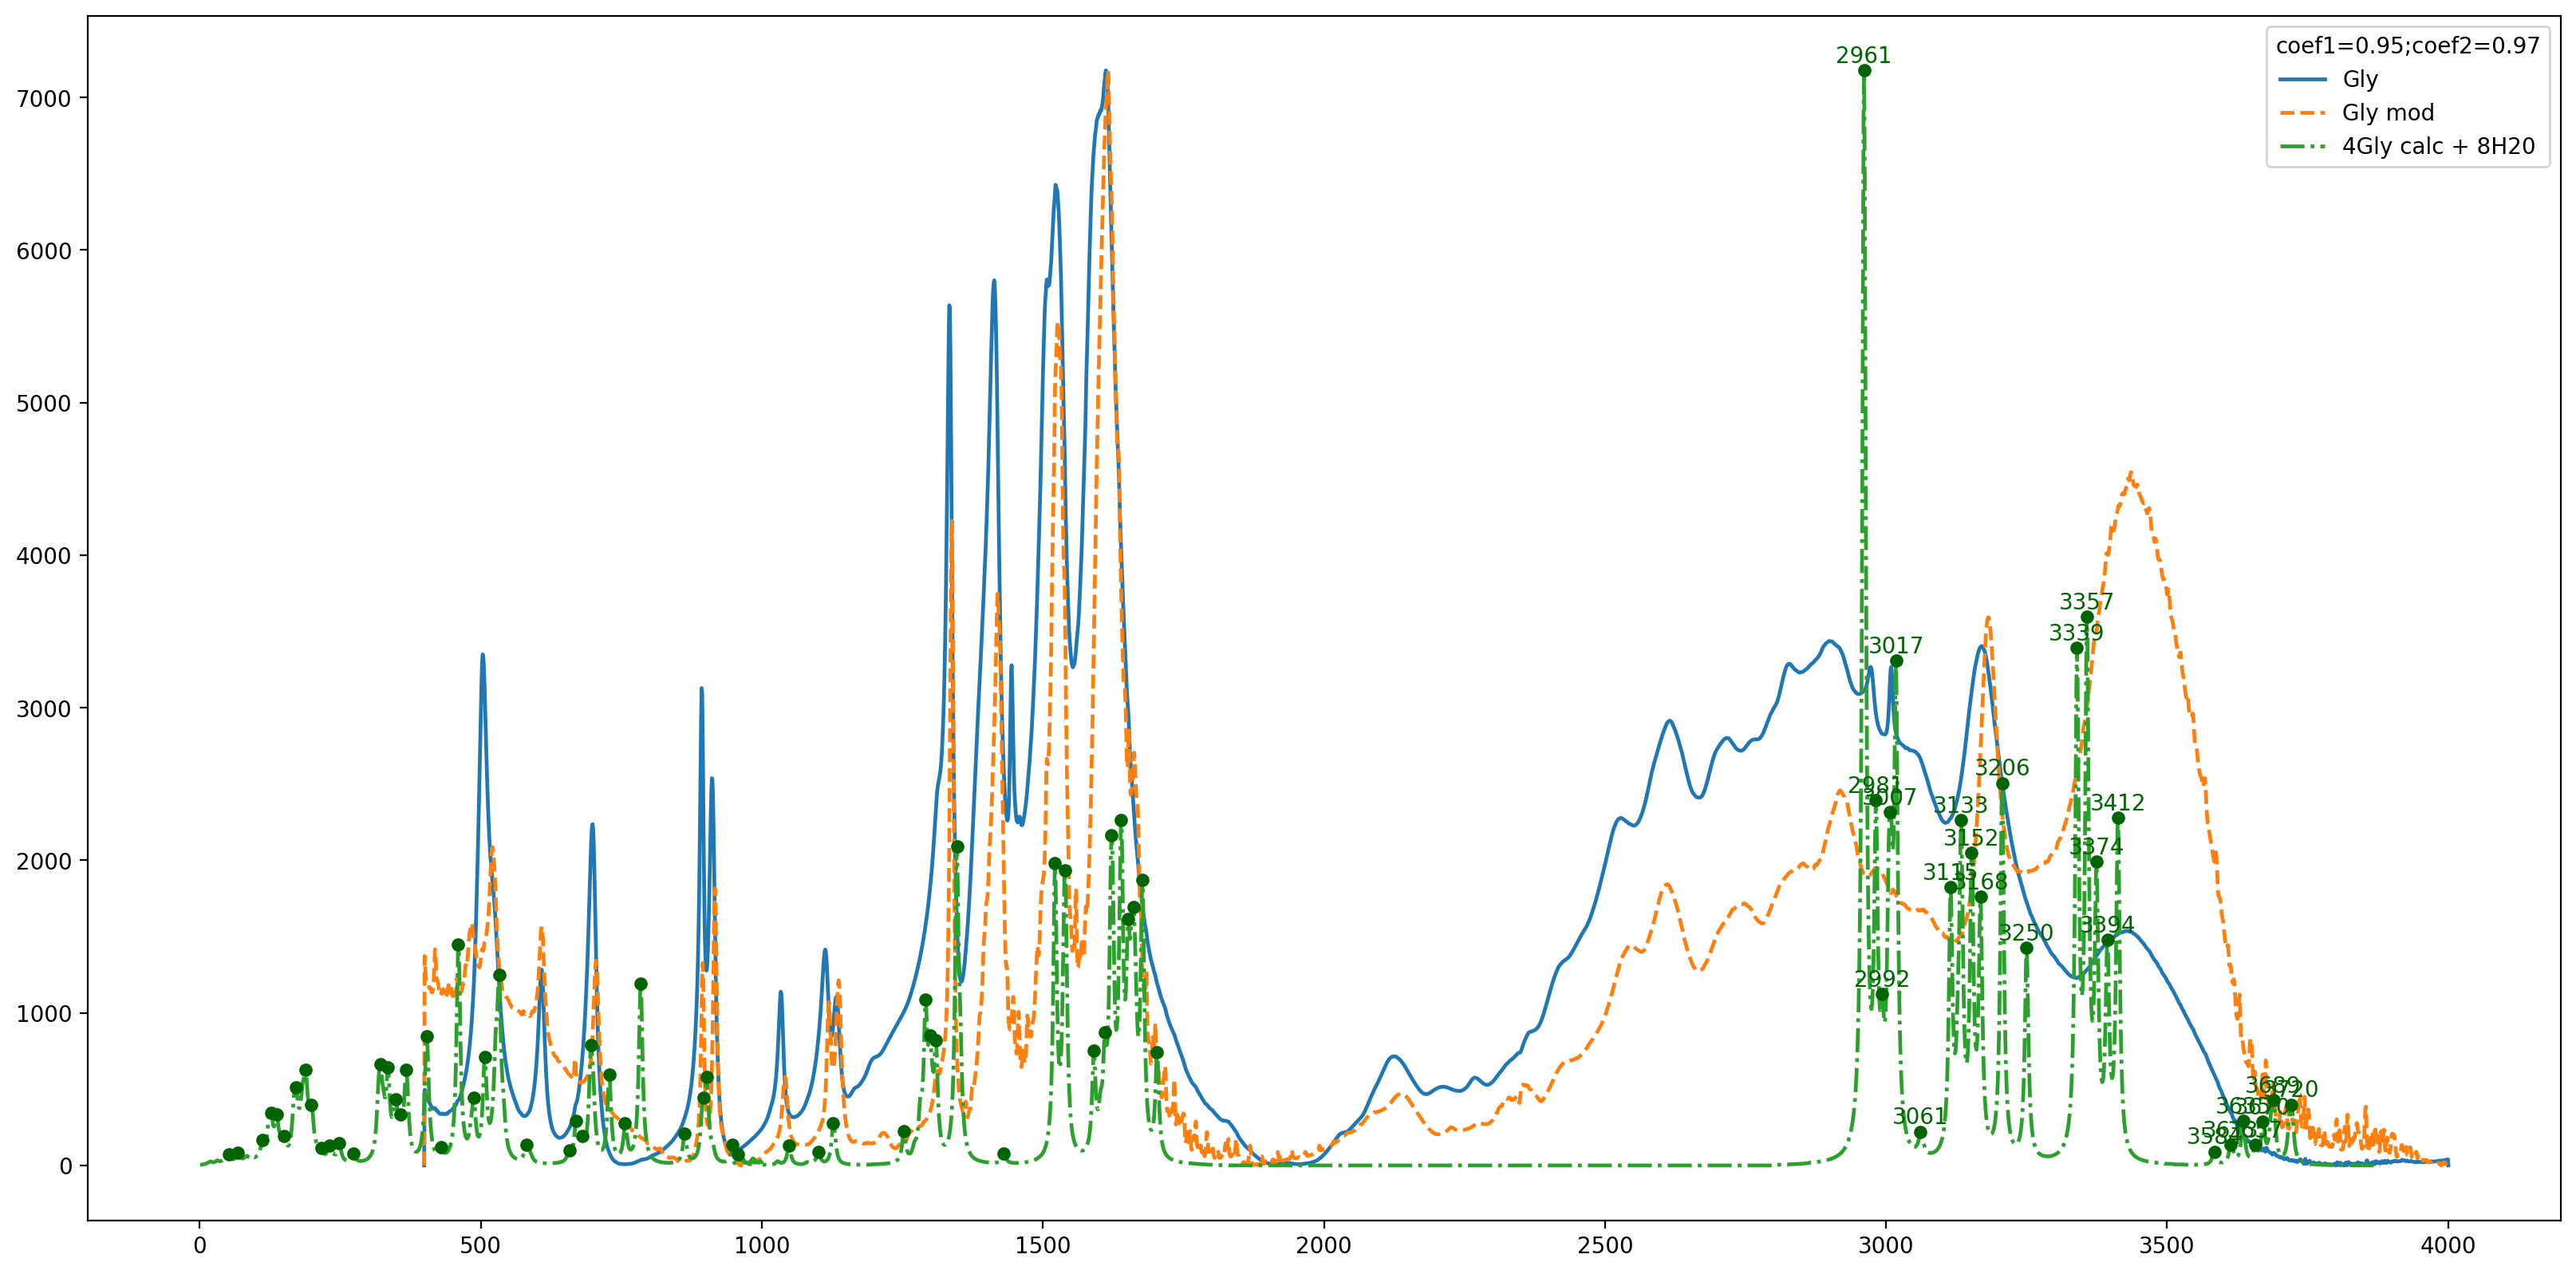

In [143]:
plot_graph_3(gly, gly_modified, four_gly_calculated_8_water, ['Gly', 'Gly mod', '4Gly calc + 8H20'], '', coef1=0.95,
             coef2=0.97)